In [26]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
import os
os.chdir ("c:\\users\\c_ton\\Documents")

In [28]:
#read data
data = pd.read_csv('./ROAD_ACCIDENT.csv',index_col='Date',parse_dates=True)
data=data.dropna()
print('shape of data',data.shape)
data.head()

shape of data (2008, 8)


,Serial Number,Name of the Data Collect Source,District where death(s) happened,Thana/Upazilla/Pourasava where Accident Happened,Number of Accident,Number of Death,Number of Injury,Age of Victim (Maximum Number of Accident Occurred in One Age Group)
Date,,,,,,,,
2015-01-01,1,JANAKANTHA,PABNA,BERA,8,9,4,4
2015-01-02,2,JANAKANTHA,GAZIPUR,TONGI,4,1,7,4
2015-01-03,3,JANAKANTHA,RANGPUR,BADARGANJ,9,3,12,3
2015-01-04,4,JANAKANTHA,GAZIPUR,SREEPUR,5,8,6,5
2015-01-05,5,JANAKANTHA,RAJSHAHI,RAJPARA,7,5,6,5


In [52]:
data1=data.drop(labels=['Name of the Data Collect Source','Thana/Upazilla/Pourasava where Accident Happened','Age of Victim (Maximum Number of Accident Occurred in One Age Group)'],axis=1)

In [53]:
data1.dtypes

Serial Number                        int64
District where death(s) happened    object
Number of Accident                   int64
Number of Death                      int64
Number of Injury                     int64
dtype: object

In [54]:
data1.replace({'PABNA': 1, 'GAZIPUR': 2, 'RANGPUR': 3, 'RAJSHAHI': 4, 'SYLHET':5, 'HABIGANJ':6, 'JHALOKATI':7, 'DHAKA':8, 'BRAHMANBARIA':9, ' SIRAJGANJ':10,' SHERPUR':11,'NARAYANGANJ':12,'DINAJPUR':13,'KUSHTIA':14,'NAOGAON':15,
             'PIROJPUR':16,'NILPHAMARI':17,'MAGURA':18,'SATKHIRA':19,'THAKURGAON':20,'FARIDPUR':21, 'MADARIPUR':22,'JAMALPUR':23,' CHATTOGRAM ':24,' MYMENSINGH ':25,'MOULVIBAZAR':26,'CHANDPUR ':27,'BARGUNA':28,'JASHORE':29,
              ' KHAGRACHHARI':30,'PATUAKHALI ':31,'SUNAMGANJ':32,' BAGERHAT':33,'KHULNA':34,"COX'S BAZAR":35,'GOPALGANJ':36,'TANGAIL':37,'MUNSHIGANJ':38,'PANCHAGARH':39, 'KISHOREGANJ':40,'NETROKONA':41,'KURIGRAM ':42,'FENI':43,
              'NATORE':44,'GAIBANDHA':45,'CUMILLA':46,' LAKSHMIPUR':47,' NARAIL':48,'NAOGAON':49,'NARSINGDI':50,'SHARIATPUR':51,'JHENAIDA':52,'JOYPURHAT':53,'BHOLA':54,'CHUADANGA':55,'CHAPAINAWABGANJ':56,'NOAKHALI':57,
              'RANGAMATI':58,'MANIKGANJ':59,'BANDARBAN':60,'SAVAR':61,'LALMANIRHAT':62,'KHAGRACHHARI':63})


,Serial Number,District where death(s) happened,Number of Accident,Number of Death,Number of Injury
Date,,,,,
2015-01-01,1,1,8,9,4
2015-01-02,2,2,4,1,7
2015-01-03,3,3,9,3,12
2015-01-04,4,2,5,8,6
2015-01-05,5,4,7,5,6
...,...,...,...,...,...
2020-06-26,2004,19,6,9,15
2020-06-27,2005,4,8,2,11
2020-06-28,2006,49,12,17,2


<AxesSubplot:xlabel='District where death(s) happened'>

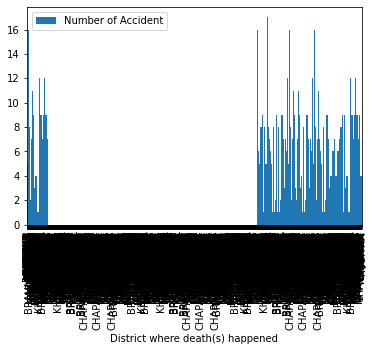

In [56]:
data1.plot.bar(x='District where death(s) happened' , y='Number of Accident')

<AxesSubplot:xlabel='Date'>

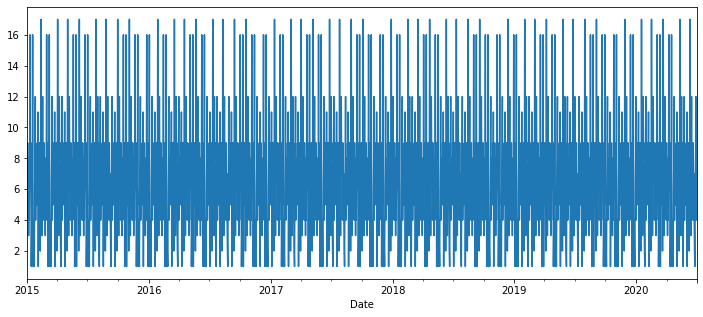

In [57]:
#plot data
data1['Number of Accident'].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

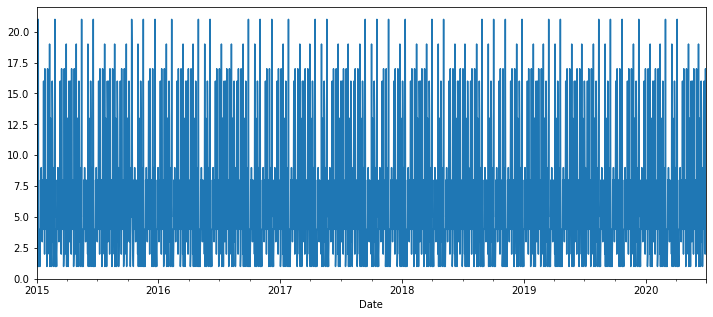

In [59]:
data1['Number of Death'].plot(figsize=(12,5))

<AxesSubplot:xlabel='Date'>

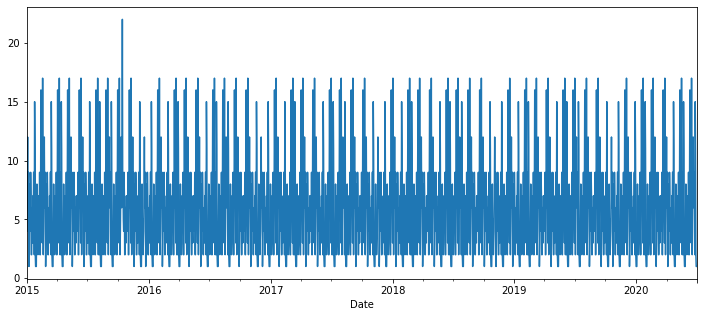

In [58]:
data1['Number of Injury'].plot(figsize=(12,5))

In [96]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    data1test = adfuller(dataset, autolag='AIC')
    print("1. ADF:" ,data1test[0])
    print("2. P-value:" ,data1test[1])
    print("3. Num of Lags:" ,data1test[2])
    print("4. Num of observation used for ADF Regression and critical values conclution:" ,data1test[3])
    print("5. critical values:")
    for key,val in data1test[4].items():
        print ("\t",key,":",val)

In [97]:
ad_test(data1['Number of Accident'])

1. ADF: -16.15669012071173
2. P-value: 4.5103099625440233e-29
3. Num of Lags: 26
4. Num of observation used for ADF Regression and critical values conclution: 1981
5. critical values:
	 1% : -3.4336552971929506
	 5% : -2.8630000946528655
	 10% : -2.5675472932714394


In [98]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
    data1test = adfuller(dataset, autolag='AIC')
    print("1. ADF:" ,data1test[0])
    print("2. P-value:" ,data1test[1])
    print("3. Num of Lags:" ,data1test[2])
    print("4. Num of observation used for ADF Regression and critical values conclution:" ,data1test[3])
    print("5. critical values:")
    for key,val in data1test[4].items():
        print ("\t",key,":",val)

In [99]:
ad_test(data1['Number of Death'])

1. ADF: -10.482967149356352
2. P-value: 1.2003877017510108e-18
3. Num of Lags: 26
4. Num of observation used for ADF Regression and critical values conclution: 1981
5. critical values:
	 1% : -3.4336552971929506
	 5% : -2.8630000946528655
	 10% : -2.5675472932714394


In [100]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [102]:
#figure out order for ARIMA model
from pmdarima import auto_arima
#ignore hramless warming
import warnings
warnings.filterwarnings("ignore")

In [103]:
stepwise_fit=auto_arima (train['Number of Accident'],trace=True,
                        suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1098.103, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1098.670, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1098.428, Time=0.04 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1381.664, Time=0.00 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1096.911, Time=0.20 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1098.628, Time=0.25 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=1098.690, Time=0.35 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=1098.599, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1099.787, Time=0.05 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=inf, Time=0.14 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 1.497 seconds


In [104]:
from statsmodels.tsa.arima_model import ARIMA

In [105]:
#split data into training and testing
print (data1.shape)
train= data.iloc [:-1808]
test = data.iloc [:-1808]
print (train.shape,test.shape)

(2008, 5)
(200, 8) (200, 8)


In [119]:
#train the model
model=ARIMA(train['Number of Accident'], order=(1,0,2))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:     Number of Accident   No. Observations:                  200
Model:                     ARMA(1, 2)   Log Likelihood                -544.345
Method:                       css-mle   S.D. of innovations              3.679
Date:                Sun, 23 May 2021   AIC                           1098.689
Time:                        20:13:46   BIC                           1115.181
Sample:                    01-01-2015   HQIC                          1105.363
                         - 07-19-2015                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        6.6445      0.175     37.975      0.000       6.302       6.987
ar.L1.Number of Accident     0.5328      0.296      1.803      0.071      -0.046       1.112
ma.L1.Number of Accident    -0.6430      0.297     -2.167      0.030      -1.225      -0.061
ma.L2.Number of Accident    -0.0447      0.092     -0.488      0.625      -0.224       0.135
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.8767           +0.0000j            1.8767            0.0000
MA.1            1.4158           +0.0000j            1.4158            0.0000
MA.2          -15.7987           +0.0000j           15.7987            0.5000
-----------------------------------------------------------------------------
"""

In [120]:
#make prediction on test set
start= len(train)
end =len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)

2015-07-20    6.776181
2015-07-21    6.946493
2015-07-22    6.805398
2015-07-23    6.730217
2015-07-24    6.690158
                ...   
2016-01-31    6.644468
2016-02-01    6.644468
2016-02-02    6.644468
2016-02-03    6.644468
2016-02-04    6.644468
Freq: D, Length: 200, dtype: float64


In [121]:
test['Number of Accident'].mean()

6.64

In [122]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['Number of Accident']))
print (rmse)

3.7303504208348754


In [123]:
model=ARIMA(test['Number of Accident'],order=(1,0,2))
model=model.fit(train=0)
test.tail()

,Serial Number,Name of the Data Collect Source,District where death(s) happened,Thana/Upazilla/Pourasava where Accident Happened,Number of Accident,Number of Death,Number of Injury,Age of Victim (Maximum Number of Accident Occurred in One Age Group)
Date,,,,,,,,
2015-07-15,196,JANAKANTHA,SHARIATPUR,SHARIATPUR SADAR,5,8,8,5
2015-07-16,197,JANAKANTHA,JHENAIDA,SHAILKUPA,9,1,4,3
2015-07-17,198,JANAKANTHA,NARAYANGANJ,BANDAR,6,2,5,5
2015-07-18,199,JANAKANTHA,MADARIPUR,KALKINI,11,17,2,4
2015-07-19,200,JANAKANTHA,KURIGRAM,BHURUNGAMARI,1,4,3,5


In [124]:
#for future data
index_future_dates=pd.date_range(start='2020-06-30',end='2021-06-30')
pred=model.predict(start=len(test),end=len(test)+365,typ='levels').rename('ARIMA prediction')
pred.index=index_future_dates

<AxesSubplot:>

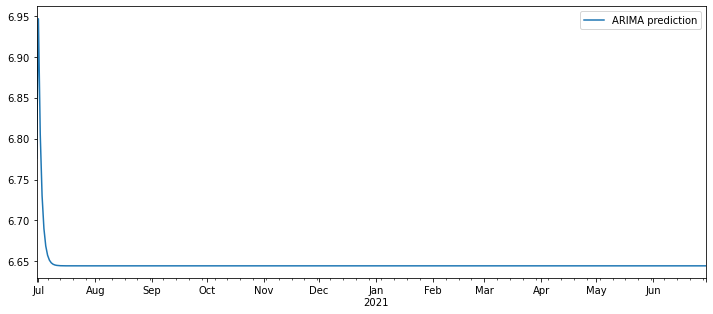

In [125]:
pred.plot(figsize=(12,5),legend=True)